# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [5]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [4]:
beta = np.linalg.lstsq(x, y)[0]
beta

array([-0.04116532,  0.25755539,  0.2012704 ,  0.16293569, -0.60689576])

In [5]:
pred = np.dot(x, beta)
pred

array([-0.25305296, -0.5284784 , -0.33802991, -0.35334286, -0.34880691,
       -0.27260561, -0.1763857 , -0.28744152, -0.18140385, -0.16946987,
       -0.26464722, -0.0696808 , -0.28933206, -0.14074203, -0.29143478,
       -0.24309006, -0.22931996, -0.19933957, -0.13120982, -0.17066269,
       -0.25639493, -0.23328847, -0.17956089, -0.13002094, -0.28311783,
       -0.05163137,  0.03702739, -0.036195  , -0.00126108, -0.09782156,
        0.00363563, -0.11556687, -0.07682828,  0.20878791, -0.06823801,
        0.08528796,  0.01499402,  0.12207746,  0.01084608,  0.08395921,
        0.23205256, -0.0434065 ,  0.20264679,  0.182787  ,  0.24024521,
        0.09558717,  0.1923502 ,  0.13555923,  0.1670698 ,  0.16756737,
        0.01311364,  0.07203151,  0.38446314,  0.27686352,  0.20357852,
        0.28314731,  0.05923779,  0.1780711 ,  0.38855436, -0.04570349,
        0.43382715,  0.36188592,  0.47656831,  0.25064972])

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

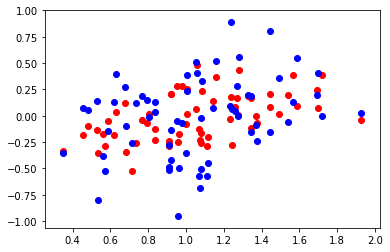

In [6]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

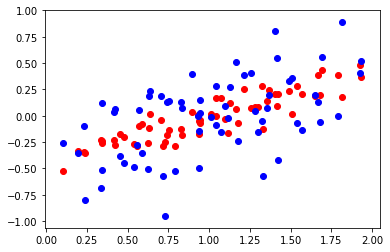

In [7]:
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [8]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [25]:
X = credit[['Income', 'Limit']].as_matrix()

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[  1.48910000e+01,   3.60600000e+03,   1.00000000e+00],
       [  1.06025000e+02,   6.64500000e+03,   1.00000000e+00],
       [  1.04593000e+02,   7.07500000e+03,   1.00000000e+00],
       ..., 
       [  5.78720000e+01,   4.17100000e+03,   1.00000000e+00],
       [  3.77280000e+01,   2.52500000e+03,   1.00000000e+00],
       [  1.87010000e+01,   5.52400000e+03,   1.00000000e+00]])

In [26]:
y = credit['Rating']

In [27]:
beta = np.linalg.lstsq(X, y)[0]
beta

array([  2.07464217e-02,   6.65723378e-02,   3.87419069e+01])

In [30]:
pred = np.dot(X, beta)

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

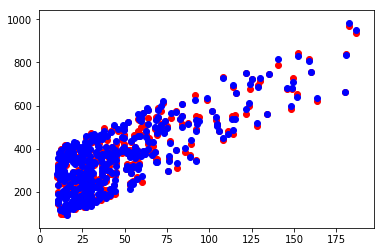

In [32]:
plt.scatter(X.T[0], pred, c='red')
plt.scatter(X.T[0], y, c='b')

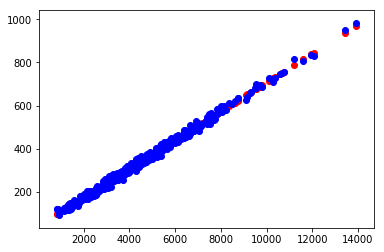

In [35]:
plt.scatter(X.T[1], pred, c='red')
plt.scatter(X.T[1], y, c='b')

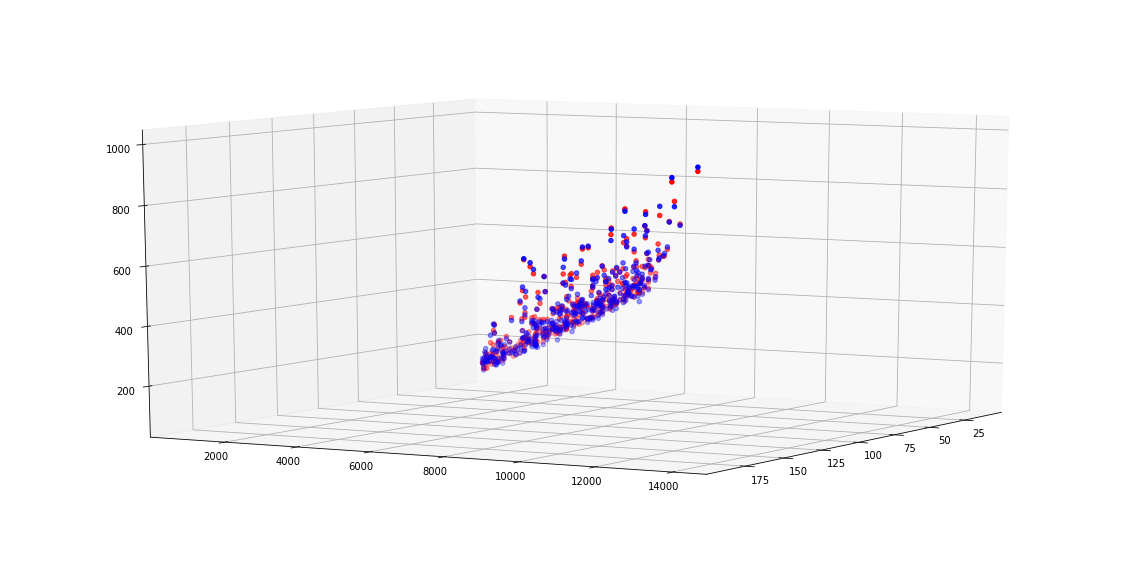

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 30)
ax.scatter(X.T[0], X.T[1], pred, zdir='z', c='r')
ax.scatter(X.T[0], X.T[1],y, zdir='z', c='b')